# Observing Distribution of Injection Volume in Dataset

Thanks to the Beer-Lambert Law, the absorbance intensity of an analyte peak is directly proportional to the injection volume of its sample. During the CUPRAC experiments we found that 10uL injections were too much, causing precipitate to form on reaction with the CURPAC reagent, so we decreased it to 5uL, but we did not track which samples were which. To make comparisons between samples with different injection volumes we need to normalize the signals in proportion to those values.

In [4]:
%load_ext autoreload
%autoreload 2

from wine_analysis_hplc_uv import definitions
from wine_analysis_hplc_uv.chemstation import chemstationprocessor
import duckdb as db
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
cp = chemstationprocessor.ChemstationProcessor(definitions.LIB_DIR)

INFO:wine_analysis_hplc_uv.chemstation.chemstationprocessor:initializing ChemstationProcessor..
08/16/2023 11:35:55 AM wine_analysis_hplc_uv.chemstation.chemstationprocessor: initializing ChemstationProcessor..
INFO:wine_analysis_hplc_uv.chemstation.chemstation_methods:Walking through /Users/jonathan/uni/0_jono_data/mres_data_library/ to find .UV files
08/16/2023 11:35:55 AM wine_analysis_hplc_uv.chemstation.chemstation_methods: Walking through /Users/jonathan/uni/0_jono_data/mres_data_library/ to find .UV files
INFO:wine_analysis_hplc_uv.chemstation.chemstation_methods:Found 175 .UV files
08/16/2023 11:35:55 AM wine_analysis_hplc_uv.chemstation.chemstation_methods: Found 175 .UV files
INFO:wine_analysis_hplc_uv.chemstation.uv_extractor_pool:Processing files..
08/16/2023 11:35:55 AM wine_analysis_hplc_uv.chemstation.uv_extractor_pool: Processing files..
INFO:wine_analysis_hplc_uv.chemstation.uv_extractor_pool:Using the multiprocessing pool to process 175 directories..
08/16/2023 11:35:

In [21]:
mdf = cp.clean_metadata()

In [23]:
mdf.head()

,path,ch_samplecode,acq_date,acq_method,unit,signal,vendor,Injection Volume,seq_name,seq_desc,vialnum,originalfilepath,id,desc,join_samplecode
0,/users/jonathan/uni/0_jono_data/mres_data_libr...,114,2023-05-09 05:00:53,avantor100x4_6c18-h2o-meoh-2_5.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-05-08_uv_vis_wines 2023-05-08 20-04-28,the autonomous ambient wine samplings. to be r...,vial 14,c:\chem32\3\data\0_jono_data\0_2023-04-12_wine...,839df657-69a3-4935-a30b-3bd17e9ae05f,2019 catena malbec vallle de uco,114
1,/users/jonathan/uni/0_jono_data/mres_data_libr...,50,2023-03-15 15:09:51,avantor100x4_6c18-h2o-meoh-2_5.m,mau,"dad1i, dad: spectrum",agilent,10.00,wines_2023-03-15_11-33-51,None,vial 5,c:\chem32\1\data\0_jono_data\wines_2023-03-15_...,36ac3c9f-aea7-4a31-a8fa-740002e3cf45,None,50
2,/users/jonathan/uni/0_jono_data/mres_data_libr...,98,2023-04-13 13:32:12,halo150x4_6c18-h2o-meoh-2_1.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-04-13_wines_2023-04-13_11-59-01,None,vial 3,c:\chem32\1\data\0_jono_data\2023-04-13_wines_...,6bf0e36f-819a-4303-9386-76d206ce3bfb,None,98
3,/users/jonathan/uni/0_jono_data/mres_data_libr...,92,2023-04-05 00:32:28,avantor100x4_6c18-h2o-meoh-2_5.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-04-04_wines_2023-04-04_12-01-53,None,vial 15,c:\chem32\1\data\0_jono_data\2023-04-04_wines_...,c1e3411f-1d9e-4780-aace-a4650b1dc9f0,None,92
4,/users/jonathan/uni/0_jono_data/mres_data_libr...,96,2023-04-13 12:00:29,avantor100x4_6c18-h2o-meoh-2_5_44-mins.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-04-13_wines_2023-04-13_11-59-01,None,vial 1,c:\chem32\1\data\0_jono_data\2023-04-13_wines_...,06902f86-0024-418d-b449-79843f96bf09,None,96


Injection Volume
10.00    104
5.00      71
Name: count, dtype: int64

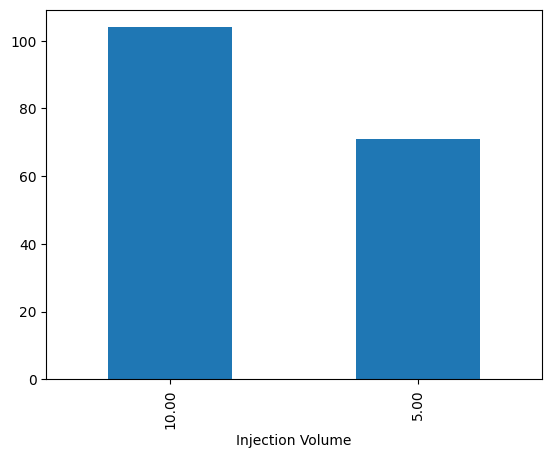

In [24]:
(mdf
 .set_index('ch_samplecode')
 .value_counts("Injection Volume")
 .pipe(lambda df: df if display(df) is None else df)
 .plot.bar()
);

In [37]:
mdf.head()

,path,ch_samplecode,acq_date,acq_method,unit,signal,vendor,Injection Volume,seq_name,seq_desc,vialnum,originalfilepath,id,desc,join_samplecode
0,/users/jonathan/uni/0_jono_data/mres_data_libr...,114,2023-05-09 05:00:53,avantor100x4_6c18-h2o-meoh-2_5.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-05-08_uv_vis_wines 2023-05-08 20-04-28,the autonomous ambient wine samplings. to be r...,vial 14,c:\chem32\3\data\0_jono_data\0_2023-04-12_wine...,839df657-69a3-4935-a30b-3bd17e9ae05f,2019 catena malbec vallle de uco,114
1,/users/jonathan/uni/0_jono_data/mres_data_libr...,50,2023-03-15 15:09:51,avantor100x4_6c18-h2o-meoh-2_5.m,mau,"dad1i, dad: spectrum",agilent,10.00,wines_2023-03-15_11-33-51,None,vial 5,c:\chem32\1\data\0_jono_data\wines_2023-03-15_...,36ac3c9f-aea7-4a31-a8fa-740002e3cf45,None,50
2,/users/jonathan/uni/0_jono_data/mres_data_libr...,98,2023-04-13 13:32:12,halo150x4_6c18-h2o-meoh-2_1.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-04-13_wines_2023-04-13_11-59-01,None,vial 3,c:\chem32\1\data\0_jono_data\2023-04-13_wines_...,6bf0e36f-819a-4303-9386-76d206ce3bfb,None,98
3,/users/jonathan/uni/0_jono_data/mres_data_libr...,92,2023-04-05 00:32:28,avantor100x4_6c18-h2o-meoh-2_5.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-04-04_wines_2023-04-04_12-01-53,None,vial 15,c:\chem32\1\data\0_jono_data\2023-04-04_wines_...,c1e3411f-1d9e-4780-aace-a4650b1dc9f0,None,92
4,/users/jonathan/uni/0_jono_data/mres_data_libr...,96,2023-04-13 12:00:29,avantor100x4_6c18-h2o-meoh-2_5_44-mins.m,mau,"dad1i, dad: spectrum",agilent,10.00,2023-04-13_wines_2023-04-13_11-59-01,None,vial 1,c:\chem32\1\data\0_jono_data\2023-04-13_wines_...,06902f86-0024-418d-b449-79843f96bf09,None,96


In [62]:
(
    mdf
    .query("acq_method.str.contains('cuprac') & (`Injection Volume`=='10.00')")
)

,path,ch_samplecode,acq_date,acq_method,unit,signal,vendor,Injection Volume,seq_name,seq_desc,vialnum,originalfilepath,id,desc,join_samplecode


And thus we have shown that the injection volume of all CUPRAC samples in current dataset have a volume of 05.00 uL.